<a href="https://colab.research.google.com/github/ericklmuniz/trabalho1GCS/blob/main/Aula_%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula Pr√°tica: √Årvores de Decis√£o

O objetivo desta aula √© construir um modelo de predi√ß√£o de inadimpl√™ncia de clientes que se aplicam para um empr√©stimo banc√°rio.

###Passo 1: Importando as bibliotecas

Ser√° necess√°rio importar diversas bibliotecas para poder rodar o modelo de √°rvores de decis√£o. Mas h√° duas bibliotecas principais: `pandas` e `scikitlearn`.

A biblioteca `pandas` implementa a estrutura de dados `Dataframe` que possui consegue organizar dados de forma tabular (ideal para organizar os dados de um dataset).

J√° a biblioteca `scikitlearn` implementa diversos algoritmos de Aprendizado de M√°quina e fornece uma interface simples, que permite executar todo o pipeline de treino e teste de modelos de forma simplificada.

Outras bibliotecas acess√≥rias s√£o necess√°rias, como `numpy`, que √© uma biblioteca matem√°tica e `matplotlib` e `seaborn` que s√£o bibliotecas de visualiza√ß√£o de dados.

*Observa√ß√£o*: Para rodar esse c√≥digo localmente, √© necess√°rio realizar a instala√ß√£o de todas esssas bibliotecas antes de rodar este c√≥digo. Para instalar uma biblioteca, rodamos o seguinte comando `pip install <nome_biblioteca>`

In [3]:
# Manipula√ß√£o de dados
import pandas as pd
import numpy as np

# Visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Divis√£o dos dados
from sklearn.model_selection import train_test_split

# M√©tricas de Avalia√ß√£o
from sklearn import metrics
from sklearn.metrics import (f1_score,
                            accuracy_score,
                            recall_score,
                            precision_score,
                            confusion_matrix,
                            roc_auc_score)

# Algoritmos de Machine Learning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Ajustes de Hiperparametros
from sklearn.model_selection import GridSearchCV

# Optional para Annotations das fun√ß√µes
from typing import Optional

###Passo 2: Carregando o Dataset

####*Descri√ß√£o dos Dados*

Nossa base de dados √© um dataset p√∫blico, disponibilizado pelo Center for Machine Learning and Intelligent Systems da Universidade da Calif√≥rnia, UCI.

Link do dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

O dataset que iremos utilizar √© de um banco da Alemanha, doado para uso p√∫blico em 1994. Toda a base de dados original est√° em Ingl√™s. Foi feita uma tradu√ß√£o livre e pequenas manipula√ß√µes de dados para fins did√°ticos.

A base de dados √© composta pelas seguintes colunas.

* **saldo_corrente**: saldo na conta corrente (categ√≥rica).
* **duracao_emp_meses**: dura√ß√£o do empr√©stimo, em meses (num√©rica).
* **historico_credito**: hist√≥rico de cr√©dito (categ√≥rica).
* **motivo**: motivo para pedido de empr√©stimo (categ√≥rica).
* **quantia**: valor do empr√©stimo pedido (num√©rica).
* **saldo_poupanca**: saldo na conta poupan√ßa (categ√≥rica).
* **tempo_empregado**: tempo no emprego atual (categ√≥rica).
* **porcentagem_renda**: porcentagem da renda comprometida pela parcela do empr√©stimo (num√©rica).
* **anos_residencia**: tempo de moradia na resid√™ncia atual, em anos (num√©rica).
* **idade**: idade do cliente, em anos (num√©rica).
* **outro_credito**: se o cliente possui empr√©stimos em outros estabelecimentos (categ√≥rica).
* **residencia**: se mora em resid√™ncia pr√≥pria ou alugada (categ√≥rica).
* **qtd_emprestimos_existentes**: quantidade de empr√©stimos existentes neste banco (num√©rica).
* **emprego**: categoria de emprego (categ√≥rica).
* **dependentes**: quantidade de dependentes (num√©rica).
* **telefone**: se o cliente possui telefone, informa√ß√£o relevante na √©poca (categ√≥rica).
* **inadimplente**: classifica√ß√£o se o cliente foi inadimplente ou n√£o, nossa *vari√°vel objetivo*.





In [4]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

# Local do dataset online
url_dataset = 'https://raw.githubusercontent.com/lopes-andre/datasets/main/credito.csv'

# Carrega os dados em um DataFrame
data = pd.read_csv(url_dataset)
data.head()

saldo_corrente  duracao_emp_meses historico_credito  \
0         < 0 DM                6.0           critico   
1     1 - 200 DM               48.0               bom   
2   desconhecido               12.0           critico   
3         < 0 DM               42.0               bom   
4         < 0 DM               24.0              ruim   

                    motivo  quantia saldo_poupanca tempo_empregado  \
0  moveis/eletrodomesticos     1169   desconhecido        > 7 anos   
1  moveis/eletrodomesticos     5951       < 100 DM      1 - 4 anos   
2                 educacao     2096       < 100 DM      4 - 7 anos   
3  moveis/eletrodomesticos     7882       < 100 DM      4 - 7 anos   
4                    carro     4870       < 100 DM      1 - 4 anos   

   porcentagem_renda  anos_residencia  idade outro_credito residencia  \
0                4.0              4.0     67        nenhum    propria   
1                2.0              2.0     22        nenhum    propria   
2                2.0              3.0     49        nenhum    propria   
3                2.0              4.0     45        nenhum     outros   
4                3.0              4.0     53        nenhum     outros   

   qtd_emprestimos_existentes          emprego  dependentes telefone  \
0                           2      qualificado            1      sim   
1                           1      qualificado            1      nao   
2                           1  nao-qualificado            2      nao   
3                           1      qualificado            2      nao   
4                           2      qualificado            2      nao   

  inadimplente  
0          nao  
1          sim  
2          nao  
3          nao  
4          sim

###Passo 3: An√°lise Estat√≠stica dos dados

Iniciaremos nosso estudo avaliando algumas estat√≠sticas do dataset que iremos utilizar:

In [5]:
# Verifica a dimens√£o dos dados
print(f'Dimens√£o dos dados: {data.shape}\n')

print(f'Esta base de dados tem {data.shape[0]} linhas e {data.shape[1]} colunas.')


Dimens√£o dos dados: (1000, 17)

Esta base de dados tem 1000 linhas e 17 colunas.


O m√©todo `describe` apresenta um resumo estat√≠stico das vari√°veis num√©ricas do dataframe. Este m√©todo nos retorna as seguintes informa√ß√µes:
* Contagem de entradas de cada coluna.
* M√©dia.
* Desvio Padr√£o.
* Valores m√≠nimo e m√°ximo de cada coluna.
* Primeiro quartil, Mediana e terceiro quartil.


In [6]:
# Algumas estat√≠sticas sobre as vari√°veis num√©ricas
data.describe()

duracao_emp_meses       quantia  porcentagem_renda  anos_residencia  \
count         996.000000   1000.000000         994.000000       997.000000   
mean           20.914659   3271.258000           2.974849         2.844534   
std            12.081621   2822.736876           1.120338         1.105346   
min             4.000000    250.000000           1.000000         1.000000   
25%            12.000000   1365.500000           2.000000         2.000000   
50%            18.000000   2319.500000           3.000000         3.000000   
75%            24.000000   3972.250000           4.000000         4.000000   
max            72.000000  18424.000000           4.000000         4.000000   

             idade  qtd_emprestimos_existentes  dependentes  
count  1000.000000                 1000.000000  1000.000000  
mean     35.546000                    1.407000     1.155000  
std      11.375469                    0.577654     0.362086  
min      19.000000                    1.000000     1.000000  
25%      27.000000                    1.000000     1.000000  
50%      33.000000                    1.000000     1.000000  
75%      42.000000                    2.000000     1.000000  
max      75.000000                    4.000000     2.000000

**Observa√ß√µes**:

* Os valores monet√°rios est√£o em Deutsche Mark (DM), moeda da Alemanha na √©poca, anterior ao Euro.
* A m√©dia de idade √© aproximadamente 35 anos e a mediana √© 33 anos.
* A m√©dia de valor dos empr√©stimos est√° em torno de 3271 DM (Deutsche Mark), mas h√° um grande range de 250 DM a 18434 DM.
* A m√©dia de parcelas dos empr√©stimos est√° em torno de 21 meses e a mediana em 18 meses.


Para analisar os dados das colunas Categ√≥ricas, podemos usar um outro trecho de c√≥digo. A c√©lula abaixo ir√° recuperar as colunas do tipo `object` e analisar as entradas de cada uma destas colunas usando a fun√ß√£o `value_counts`.

In [7]:
# Lista de vari√°veis categ√≥ricas
colunas_cat = data.select_dtypes(include=['object']).columns.tolist()

# Estat√≠sticas sobre as vari√°veis categ√≥ricas
for coluna in colunas_cat:
    print(f'### Coluna <{coluna}> ###')
    print(data[coluna].value_counts())
    print('-' * 40)


### Coluna <saldo_corrente> ###
saldo_corrente
desconhecido    394
< 0 DM          274
1 - 200 DM      269
> 200 DM         63
Name: count, dtype: int64
----------------------------------------
### Coluna <historico_credito> ###
historico_credito
bom          530
critico      293
ruim          88
muito bom     49
perfeito      40
Name: count, dtype: int64
----------------------------------------
### Coluna <motivo> ###
motivo
moveis/eletrodomesticos    473
carro                      337
negocios                    97
educacao                    59
renovacao                   22
carr0                       12
Name: count, dtype: int64
----------------------------------------
### Coluna <saldo_poupanca> ###
saldo_poupanca
< 100 DM         603
desconhecido     183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
----------------------------------------
### Coluna <tempo_empregado> ###
tempo_empregado
1 - 4 anos      339
> 7 anos        253
4 - 7 ano

**Observa√ß√µes**:
* Temos poucos clientes desempregados na base de dados.
* H√° uma classe na coluna motivo que parece ter sofrido erro de digita√ß√£o.
* A nossa vari√°vel alvo, inadimplente, est√° desbalanceada. Apenas 30% das observa√ß√µes est√£o na Classe 1 (inadimplente) e 70% na Classe 0 (n√£o inadimplente).

A fun√ß√£o `info` apresenta um resumo contendo o n√∫mero de entrada n√£o nulas e o tipo de cada uma das colunas do Dataframe.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   saldo_corrente              1000 non-null   object 
 1   duracao_emp_meses           996 non-null    float64
 2   historico_credito           1000 non-null   object 
 3   motivo                      1000 non-null   object 
 4   quantia                     1000 non-null   int64  
 5   saldo_poupanca              1000 non-null   object 
 6   tempo_empregado             1000 non-null   object 
 7   porcentagem_renda           994 non-null    float64
 8   anos_residencia             997 non-null    float64
 9   idade                       1000 non-null   int64  
 10  outro_credito               1000 non-null   object 
 11  residencia                  1000 non-null   object 
 12  qtd_emprestimos_existentes  1000 non-null   int64  
 13  emprego                     1000 n

Repare que temos dados nulos/faltantes, pois nem todas as colunas possuem 1000 entradas n√£o-nulas.

Vamos executar um c√≥digo para verificar exatamente quantos dados faltantes cada coluna tem.

In [9]:
# Verificando dados nulos
print('Colunas com dados nulos:')
display(data.isnull().sum()[data.isnull().sum() > 0])

Colunas com dados nulos:


duracao_emp_meses    4
porcentagem_renda    6
anos_residencia      3
dtype: int64

###Passo 4: Pr√©-Processamento

Na fase de Pr√©-Processamento vamos preparar o dataset para que ele seja utilizado pelo algoritmo de aprendizagem de m√°quina. Essa √© uma etapa de extrema import√¢ncia, pois ela serva para corrigir poss√≠veis erros que possam haver nos dados, al√©m de aplicar opera√ß√µes de normaliza√ß√£o, que adequam o dataset para o algoritmo.

####Corrigindo erros no dataset

Como notado anteriormente, h√° um erro de digita√ß√£o em uma das categorias do atributo motivo. Vamos analisar este ponto e corrigir conforme necess√°rio.

In [10]:
# Exibe as categorias da vari√°vel motivo
data['motivo'].value_counts()

motivo
moveis/eletrodomesticos    473
carro                      337
negocios                    97
educacao                    59
renovacao                   22
carr0                       12
Name: count, dtype: int64

Vamos realizar a substitui√ß√£o da palavra `carr0` por `carro`

In [11]:
# Corrige o erro de digita√ß√£o
corrige_carro = {'carr0': 'carro'}
data.replace(corrige_carro, inplace=True)

# Verifica as categorias novamente
data['motivo'].value_counts()

motivo
moveis/eletrodomesticos    473
carro                      349
negocios                    97
educacao                    59
renovacao                   22
Name: count, dtype: int64

Note que a entrada "carr0", que era aparentemente um erro de digita√ß√£o, j√° n√£o existe mais. Problema corrigido!

#### Transformando Vari√°veis Categ√≥ricas em Num√©ricas

Apesar do algoritmo ID3 lidar com vari√°veis categ√≥ricas, sua implementa√ß√£o na bibliotecas `scikit learn` n√£o aceita valores categ√≥ricos em sua entrada. Precisamos ent√£o realizar a **discretiza√ß√£o** dos dados, que consite em converter essas vari√°veis para dados num√©ricos.

Primeiramente, vamos converter as vari√°veis que cont√©m dados ordinais, onde h√° uma rela√ß√£o de ordenamento dos dados. Para isso, vamos atribuir um valor inteiro, em ordem crescente, para cada categoria, de modo a manter a ordem existente nos dados.


In [12]:
# Convertendo vari√°veis Categ√≥ricas Ordinais
conversao_variaveis = {
    'saldo_corrente': {
        'desconhecido': -1,
        '< 0 DM': 1,
        '1 - 200 DM': 2,
        '> 200 DM': 3,
    },
    'historico_credito': {
        'critico': 1,
        'ruim': 2,
        'bom': 3,
        'muito bom': 4,
        'perfeito': 5
    },
    'saldo_poupanca': {
        'desconhecido': -1,
        '< 100 DM': 1,
        '100 - 500 DM': 2,
        '500 - 1000 DM': 3,
        '> 1000 DM': 4,
    },
    'tempo_empregado': {
        'desempregado': 1,
        '< 1 ano': 2,
        '1 - 4 anos': 3,
        '4 - 7 anos': 4,
        '> 7 anos': 5,
    },
    'telefone': {
        'nao': 1,
        'sim': 2,
    }
}

data.replace(conversao_variaveis, inplace=True)
data.sample(5)

saldo_corrente  duracao_emp_meses  historico_credito  \
607               2               36.0                  3   
520              -1               24.0                  1   
47                1                6.0                  3   
797              -1               12.0                  1   
979               2               15.0                  4   

                      motivo  quantia  saldo_poupanca  tempo_empregado  \
607  moveis/eletrodomesticos     2671               2                3   
520                renovacao     5507               1                5   
47                     carro     1352               3                1   
797  moveis/eletrodomesticos     1258               1                2   
979                    carro     1264               2                3   

     porcentagem_renda  anos_residencia  idade outro_credito residencia  \
607                4.0              4.0     50        nenhum     outros   
520                3.0              4.0     44        nenhum     outros   
47                 1.0              2.0     23        nenhum    alugada   
797                2.0              4.0     22        nenhum    alugada   
979                2.0              2.0     25        nenhum    alugada   

     qtd_emprestimos_existentes          emprego  dependentes  telefone  \
607                           1      qualificado            1         1   
520                           2      qualificado            1         1   
47                            1     desempregado            1         2   
797                           2  nao-qualificado            1         1   
979                           1      qualificado            1         1   

    inadimplente  
607          sim  
520          nao  
47           nao  
797          nao  
979          sim

#### Discretiza√ß√£o de Vari√°veis n√£o Ordinais

Para vari√°veis categ√≥ricas podemos aplicar a t√©cnica de **OneHotEncoding**. Nesta t√©cnica, cada categoria se transforma em uma coluna de valores bin√°rios (0 ou 1). Por exemplo, o atributo motivo que possui 5 categorias, vai se transformar em 4 colunas distintas.

Exemplo
O atributo motivo possui 5 categorias:

moveis/eletrodomesticos

1. moveis/eletrodomesticos
2. carro
3. negocios
4. educacao
5. renovacao

Ao aplicar a t√©cnica de OneHotEncoding, o DataFrame ficaria da seguinte forma.

|motivo| motivo_carro | motivo_negocios | motivo_educa√ß√£o | motivo_renova√ß√£o |
|:----:|:------------:|:---------------:|:---------------:|:----------------:|
| carro| 1            | 0               | 0               | 0                |
| negocios| 0            | 1               | 0               | 0                |
| educacao | 0            | 0               | 1               | 0                |
| renovacao| 0            | 0               | 0               | 1                |
| moveis/eletrodomesticos| 0            | 0               | 0               | 0                |

Para evitar a Multicolinearidade, n√≥s configuramos a fun√ß√£o para excluir a primeira coluna, pois ela n√£o √© necess√°ria. Caso a observa√ß√£o n√£o se encaixe em nenhuma das 4 categorias acima, ela obviamente vai se encaixar na quinta, que no nosso caso √© a moveis/eletrodomesticos. Ter o valor 0 em todas as colunas significa que est√° nesta categoria.

Como essa t√©cnica de OneHotEncoding deve ser aplicada apenas sobre as colunas categ√≥ricas, vamos isolar esse tipo de colunas.

In [13]:
# Gera a lista de vari√°veis categ√≥ricas
cols_cat = data.select_dtypes(include='object').columns.tolist()

# Removendo 'inadimplente' pois √© nossa vari√°vel Alvo
cols_cat.remove('inadimplente')

cols_cat

['motivo', 'outro_credito', 'residencia', 'emprego']

E, finalmente, implementamos o OneHotEncoding.

In [14]:
# Implementa o OneHotEncoding
data = pd.get_dummies(data, columns=cols_cat, drop_first=True)

data.head()

saldo_corrente  duracao_emp_meses  historico_credito  quantia  \
0               1                6.0                  1     1169   
1               2               48.0                  3     5951   
2              -1               12.0                  1     2096   
3               1               42.0                  3     7882   
4               1               24.0                  2     4870   

   saldo_poupanca  tempo_empregado  porcentagem_renda  anos_residencia  idade  \
0              -1                5                4.0              4.0     67   
1               1                3                2.0              2.0     22   
2               1                4                2.0              3.0     49   
3               1                4                2.0              4.0     45   
4               1                3                3.0              4.0     53   

   qtd_emprestimos_existentes  ...  motivo_moveis/eletrodomesticos  \
0                           2  ...                            True   
1                           1  ...                            True   
2                           1  ...                           False   
3                           1  ...                            True   
4                           2  ...                           False   

   motivo_negocios motivo_renovacao  outro_credito_loja  outro_credito_nenhum  \
0            False            False               False                  True   
1            False            False               False                  True   
2            False            False               False                  True   
3            False            False               False                  True   
4            False            False               False                  True   

   residencia_outros  residencia_propria  emprego_gerencial  \
0              False                True              False   
1              False                True              False   
2              False                True              False   
3               True               False              False   
4               True               False              False   

   emprego_nao-qualificado  emprego_qualificado  
0                    False                 True  
1                    False                 True  
2                     True                False  
3                    False                 True  
4                    False                 True  

[5 rows x 24 columns]

#### Convertendo a Vari√°vel Objetivo

A vari√°vel `inadimplente` √© a √∫nica vari√°vel que ainda precisa ser convertida. Para classifica√ß√£o bin√°ria (duas classes) vamos dividir as classes em Classe 0 (n√£o) e Classe 1 (sim).

Desta forma as entradas 0 indicar√£o clientes n√£o inadimplentes e 1 indica clientes inadimplentes.

In [15]:
# Convertendo a vari√°vel alvo
conversao_alvo = {
    'inadimplente': {'nao': 0, 'sim': 1}
}

data.replace(conversao_alvo, inplace=True)
data['inadimplente']

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: inadimplente, Length: 1000, dtype: int64

#### Lidando com Valores Faltantes

Existem diversas formas de tratar valores faltantes. N√≥s podemos remover as entradas, substituir os valores faltantes com a M√©dia ou Mediana das colunas, etc.

Neste exemplo, iremos substituir os valores faltantes pela M√©dia dos valores da sua coluna.

In [16]:
# Imputando os valores nulos com a m√©dia
data = data.fillna(data.mean())

In [17]:
# Verifica valores nulos novamente
data.isnull().sum()

saldo_corrente                    0
duracao_emp_meses                 0
historico_credito                 0
quantia                           0
saldo_poupanca                    0
tempo_empregado                   0
porcentagem_renda                 0
anos_residencia                   0
idade                             0
qtd_emprestimos_existentes        0
dependentes                       0
telefone                          0
inadimplente                      0
motivo_educacao                   0
motivo_moveis/eletrodomesticos    0
motivo_negocios                   0
motivo_renovacao                  0
outro_credito_loja                0
outro_credito_nenhum              0
residencia_outros                 0
residencia_propria                0
emprego_gerencial                 0
emprego_nao-qualificado           0
emprego_qualificado               0
dtype: int64

###Passo 5: Divis√£o dos Dados

Ser√° necess√°rio dividir o dataset em quatro conjuntos: precisamos separar a vari√°vel objetivo das demais features do dataset. E temos tamb√©m que dividir os dados em conjuntos de treino e teste.

√â comum chamarmos o dataset contendo as features como `X` e o dataset contendo a vari√°vel objetivo como `y`. Adotaremos essa nomenclatura neste exemplo.

In [18]:
# Vari√°veis independentes (caracter√≠sticas)
X = data.drop(['inadimplente'], axis=1)

# Vari√°vel dependente (alvo)
y = data['inadimplente']

Precisamos agora dividir a nossa base de dados entre **Treino** e **Teste**. Vamos separar uma parte dos dados (80% neste caso) para realizar o treino do modelo e uma outra parte (20%) para testarmos e se o modelo de fato aprendeu, ou se apenas ‚Äúdecorou‚Äù respostas e se ‚Äúajustou demais‚Äù ao problema (Overfitting).

Como temos um certo desbalanceio na nossa vari√°vel alvo, √© interessante mantermos as mesmas propor√ß√µes de classes positivas e negativas tanto na base de treino quanto na de teste. A divis√£o √© aleat√≥ria, e n√£o devemos perder esta propor√ß√£o.

Para isso, iremos fazer uso do argumento `stratify=y` da fun√ß√£o `train_test_split` dispon√≠vel na biblioteca `Scikit-learn`. Este argumento ir√° manter as devidas propor√ß√µes das classes de `y` para treino e teste.

In [19]:
# Divis√£o dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   random_state=1,
                                                   stratify=y) # mant√©m as propor√ß√µes das classes


In [20]:
# Verifica as propor√ß√µes de classes nos dados
print('### Propor√ß√£o de Classes em Treino ###')
print(f'Porcentagem de entradas Classe 0: {y_train.value_counts(normalize=True).values[0] * 100}%')
print(f'Porcentagem de entradas Classe 1: {y_train.value_counts(normalize=True).values[1] * 100}%')
print()

print('### Propor√ß√£o de Classes em Teste ###')
print(f'Porcentagem de entradas Classe 0: {y_test.value_counts(normalize=True).values[0] * 100}%')
print(f'Porcentagem de entradas Classe 1: {y_test.value_counts(normalize=True).values[1] * 100}%')


### Propor√ß√£o de Classes em Treino ###
Porcentagem de entradas Classe 0: 70.0%
Porcentagem de entradas Classe 1: 30.0%

### Propor√ß√£o de Classes em Teste ###
Porcentagem de entradas Classe 0: 70.0%
Porcentagem de entradas Classe 1: 30.0%


###Passo 6: Medidas de Performance

Ap√≥s ter um modelo treinado, temos de avaliar a capacidade dele de realizar predi√ß√µes. Para isso, realizamos a predi√ß√£o sobre o dataset de teste e comparamos com a sa√≠da esperada, conforme mostrado na figura abaixo:

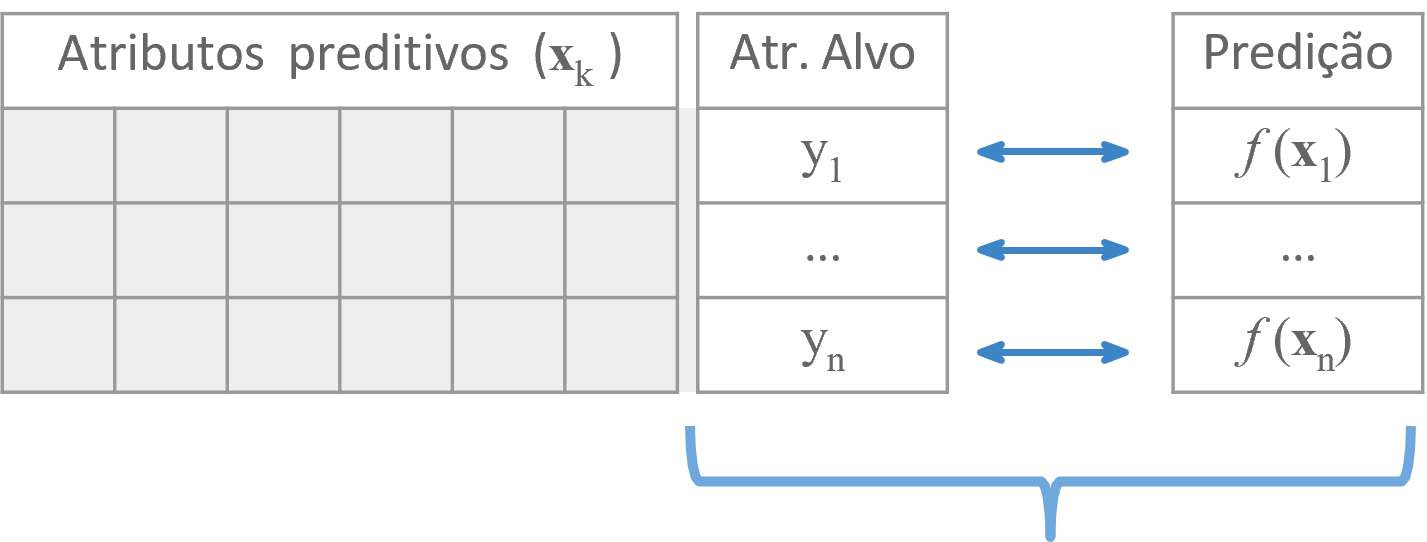

Podemos sumarizar esse processo usando uma **matriz de confus√£o**, que √© uma representa√ß√£o tabular da Classe Prevista vs a Classe Real. Ela possui a seguinte representa√ß√£o:

<img src="https://brains.dev/wp-content/uploads/2023/01/cm1.png" alt="drawing" style="width:100px;"/>


Em problemas de classiÔ¨Åca√ß√£o bin√°ria, usualmente uma classe (de interesse) √© denotada como Positiva (+) e a outra como Negativa (-), e s√£o quantiÔ¨Åcados os valores de:

* **Verdadeiros Positivos (TP)**: inst√¢ncias positivas corretamente classiÔ¨Åcadas como positivas
* **Verdadeiros Negativos (TN)**: inst√¢ncias negativas corretamente classiÔ¨Åcadas como negativas
* **Falsos Positivos (FP)**: inst√¢ncias negativas incorretamente classiÔ¨Åcadas como positivas
* **Falsos Negativos (FN)**: inst√¢ncias positivas incorretamente classiÔ¨Åcadas como negativas




Algumas medidas que podemos calcular sobre a matriz de confus√£o:

**Acur√°cia**: A Acur√°cia (Accuracy) √© provavelmente a forma mais intuitiva de se medir a performance do modelo. √â s√≥ vermos, de todos os exemplos que temos, quantos ele acertou. Se fornecemos 100 exemplos e o modelo acertou 90, temos uma Acur√°cia de 90/100. Ou seja, 90%.

$$Acc=\frac{TP+TN}{TP+TN+FP+FN}$$

A  acur√°cia  n√£o  √©  uma  boa  m√©trica  para  problemas  com  dados 	desbalanceados, isto √©, quando h√° desequil√≠brio no n√∫mero de inst√¢ncias por classe.

Atrav√©s da matriz de confus√£o, √© poss√≠vel extrair outras medidas para 	avaliar os diferentes tipos de erros e acertos do modelo de classiÔ¨Åca√ß√£o.




**Precis√£o**: A Precis√£o (Precision) √© definida como a fra√ß√£o dos resultados positivos corretos em rela√ß√£o a todos os resultados positivos produzidos pelo modelo. A pergunta que Precis√£o tenta responder √©: Qual a propor√ß√£o de predi√ß√µes positivas que estavam realmente corretas?

$$Precis√£o = \frac{TP}{TP+FP}$$

**Revoca√ß√£o (recall)**: A revoca√ß√£o consiste na fra√ß√£o dos resultados positivos corretos em rela√ß√£o a todos os resultados positivos reais. A pergunta que Recall tenta responder √©: Qual a propor√ß√£o de valores positivos que foi identificada corretamente?

$$Revocacao = \frac{TP}{TP+FN}$$

**F1-Score**: O F1-Score tamb√©m √© conhecido como *F-score* ou *F-measure*. √â uma m√©trica que leva em considera√ß√£o a Precis√£o e a Revoca√ß√£o. Pode ser usado como uma forma de buscar equil√≠brio entre as duas medidas. Essa medida consiste na m√©dia harm√¥nica da Precis√£o e da Revoca√ß√£o. Assim sendo, ele leva em considera√ß√£o tanto os erros de Falso Positivos (FP) quanto os de Falso Negativos (FN). A f√≥rmula do F1-Score √© a seguinte.

$$F1=\frac{2‚àóPrecisao‚àóRevocacao}{Precisao +Revocacao}$$

O maior valor poss√≠vel para o F1-Score √© 1.0, indicando Precis√£o e Recall perfeitos, e o valor m√≠nimo poss√≠vel √© 0.0.

**Leia mais**: [neste artigo](https://brains.dev/2023/medidas-de-performance-modelos-de-classificacao/)

---
Iremos agora declarar algumas fun√ß√µes √∫teis para monitorarmos a performance dos nossos modelos.



In [21]:
def performance_modelo_classificacao(
    model: object,
    flag: Optional[bool] = True):

    '''
    Fun√ß√£o para computar as diferentes m√©tricas de performance para modelos de classifica√ß√£o.

    model: modelo para prever os valores de X
    flag: se imprimimos ou n√£o os resultados
    '''

    # Lista para armazenar os resultados de Treino e Valida√ß√£o
    score_list = []

    # Predi√ß√£o em Treino e Valida√ß√£o
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Acur√°cia do modelo
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    # Recall do modelo
    train_recall = recall_score(y_train, pred_train)
    test_recall = recall_score(y_test, pred_test)

    # Precis√£o do modelo
    train_prec = precision_score(y_train, pred_train)
    test_prec = precision_score(y_test, pred_test)

    # F1-Score do modelo
    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)

    # Popula a lista
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_prec, test_prec, train_f1, test_f1))

    # Imprime a lista se flag=True (default)
    if flag:
        print(f'Acur√°cia na base de Treino: {train_acc}')
        print(f'Acur√°cia na base de Teste: {test_acc}')
        print(f'\nRecall na base de Treino: {train_recall}')
        print(f'Recall na base de Teste: {test_recall}')
        print(f'\nPrecis√£o na base de Treino: {train_prec}')
        print(f'Precis√£o na base de Teste: {test_prec}')
        print(f'\nF1-Score na base de Treino: {train_f1}')
        print(f'F1-Score na base de Teste: {test_f1}')

    # Retorna a lista de valores em Treino e Valida√ß√£o
    return score_list

In [22]:
def matriz_confusao(
    model: object,
    X: pd.DataFrame,
    y_actual: pd.Series,
    labels: Optional[tuple] = (1, 0)):

    '''
    Plota a Matriz de Confus√£o com porcentagens.

    model: modelo para prever os valores de X
    X: atributos usados para a classfica√ß√£o
    y_actual: classifica√ß√£o real, vari√°vel alvo
    '''

    # Predi√ß√£o em Valida√ß√£o
    y_predict = model.predict(X)

    # Pega os dados da Matriz de Confus√£o
    cm = confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=['Real - N√£o (0)', 'Real - Sim (1)'],
                        columns=['Previsto - N√£o (0)', 'Previsto - Sim (1)'])

    # List of labels for the Confusion Matrix
    group_counts = [f'{value:.0f}' for value in cm.flatten()]
    group_percentages = [f'{value:.2f}%' for value in (cm.flatten()/np.sum(cm))*100]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot the Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.xlabel('Classe Prevista', fontweight='bold')
    plt.ylabel('Classe Real', fontweight='bold')
    plt.show()

###Passo 7: Treino do Modelo

O treino do nosso primeiro modelo vai ser extremamente simples. N√≥s iremos usar a classe `sklearn.tree.DecisionTreeClassifier` para treinar o modelo de √Årvore de Decis√£o.

Para isso iremos instanciar um objeto `DecisionTreeClassifier` e vamos fazer com que ele se ajuste aos dados de treinamento, com o m√©todo `fit`.

In [23]:
# Instanciando o Modelo
arvore_d = DecisionTreeClassifier(criterion="entropy", random_state=1)

# Treinando o modelo
arvore_d.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Nosso modelo est√° treinado! Vamos agora rodar as fun√ß√µes que calculam as m√©tricas de avalia√ß√£o para medir o desempenho dos dados nos conjuntos de treino e de teste



In [24]:
arvore_d_scores = performance_modelo_classificacao(arvore_d)

Acur√°cia na base de Treino: 1.0
Acur√°cia na base de Teste: 0.73

Recall na base de Treino: 1.0
Recall na base de Teste: 0.55

Precis√£o na base de Treino: 1.0
Precis√£o na base de Teste: 0.55

F1-Score na base de Treino: 1.0
F1-Score na base de Teste: 0.55


Podemos notar que houve **Overfitting** no nosso modelo! A √Årvore de Decis√£o cresceu sem controle e acertou 100% de todas as observa√ß√µes de treino, mas falhou nos dados de teste. Aparentemente o modelo est√° decorando as respostas da base de treino e sua performance real est√° similar a jogar cara ou coroa.

Vamos tentar visualizar isso na Matriz de Confus√£o.



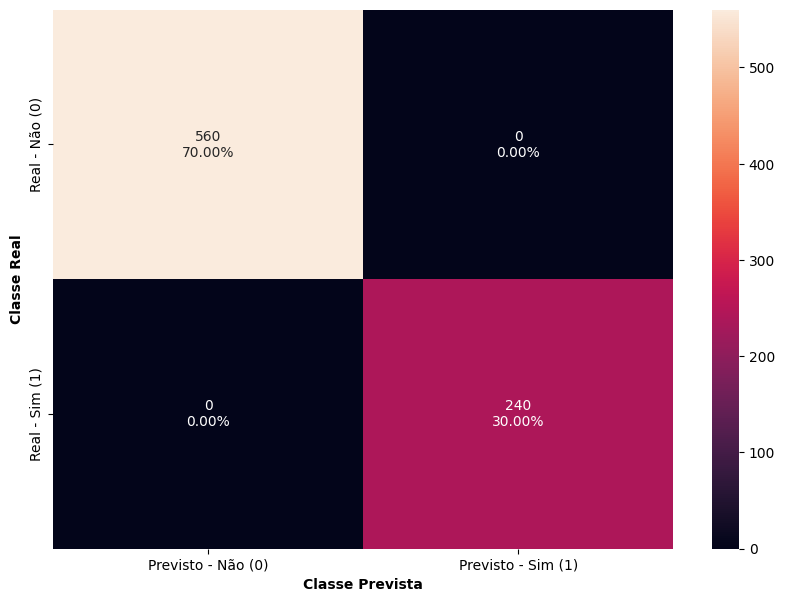

In [25]:
# Matriz de Confus√£o de treino
matriz_confusao(arvore_d, X_train, y_train)

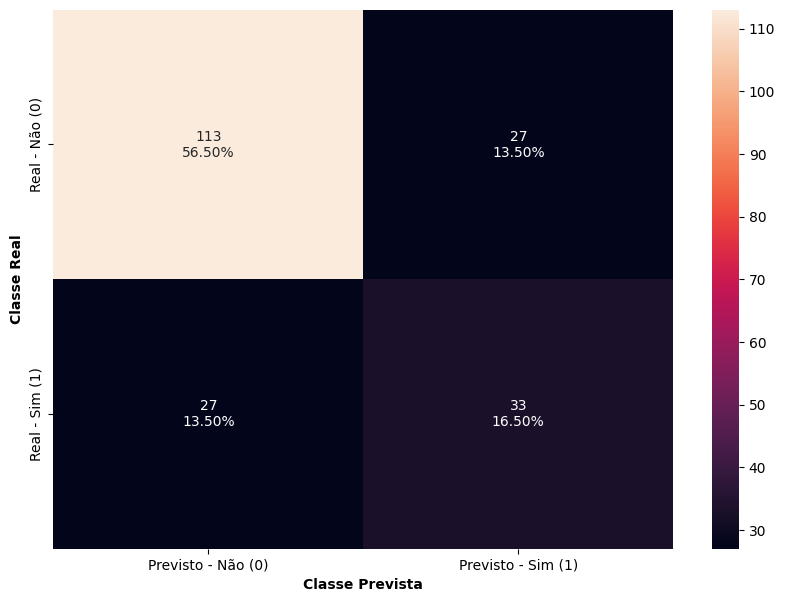

In [26]:
# Matriz de Confus√£o de teste
matriz_confusao(arvore_d, X_test, y_test)

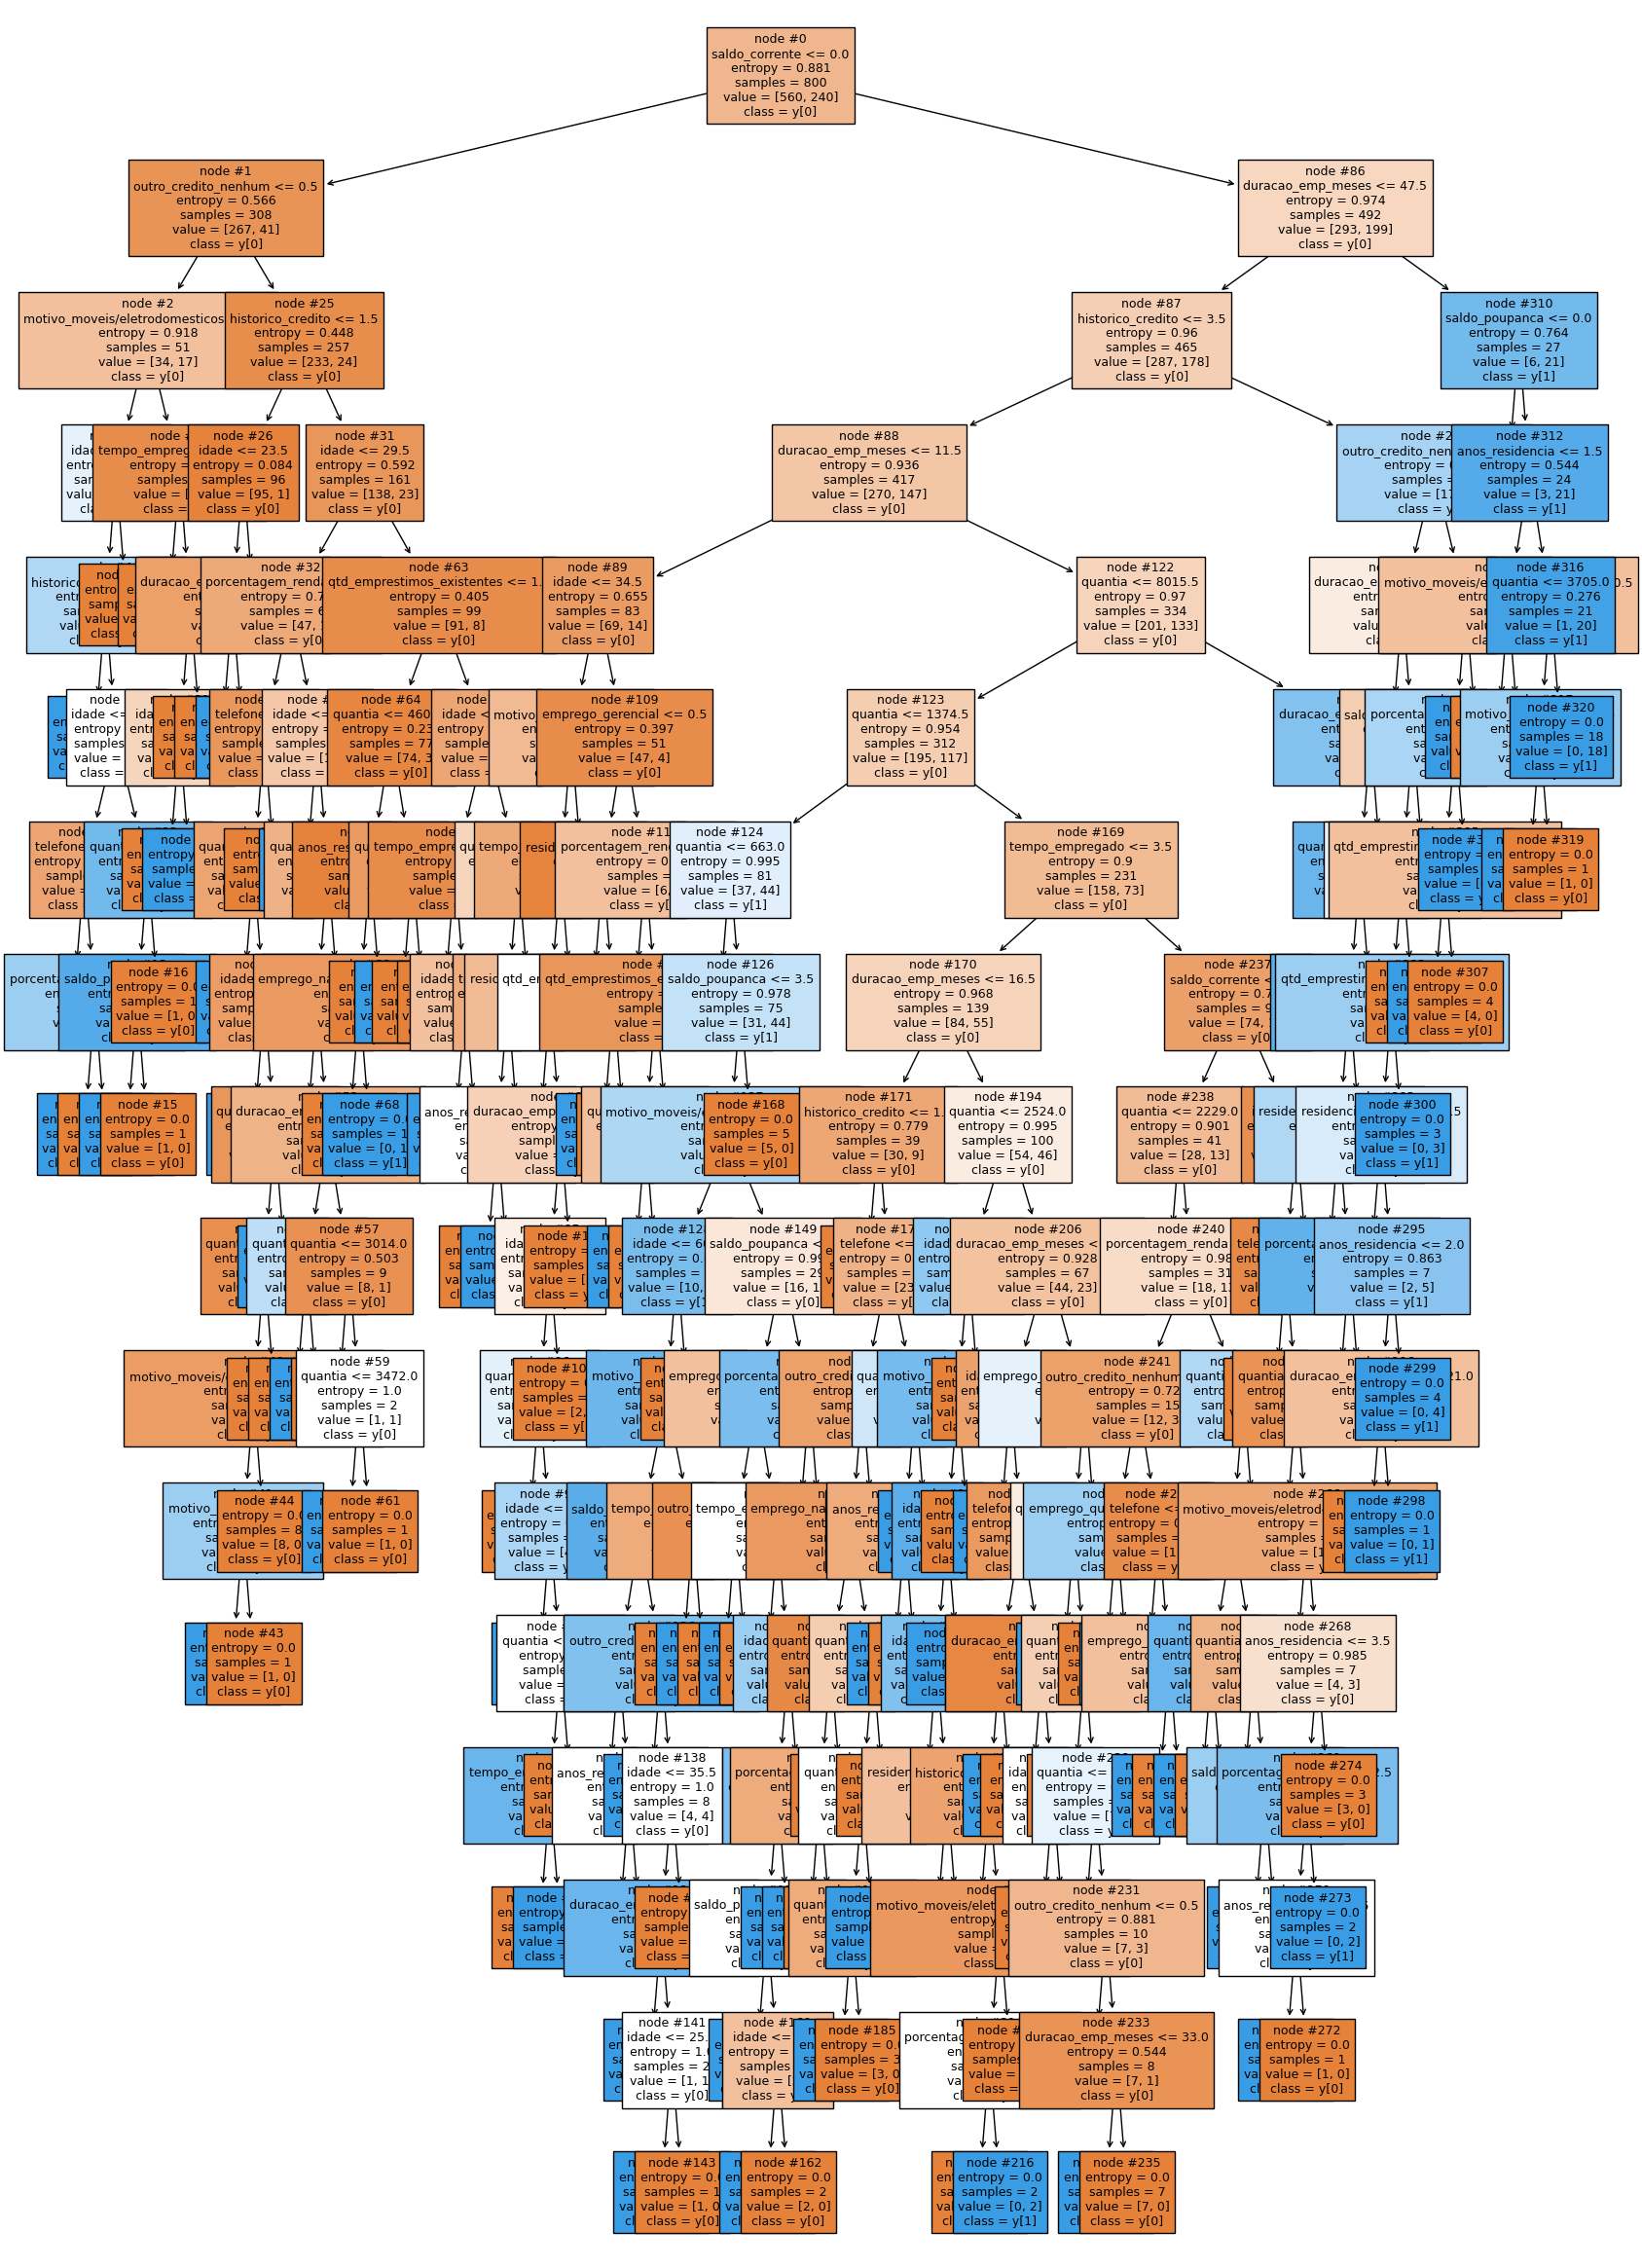

In [27]:
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 30))
tree.plot_tree(arvore_d, feature_names=feature_names, filled=True,
            fontsize=9, node_ids=True, class_names=True);

A √°rvore aprendida pelo modelo √© muito complexa e profunda! Modelos complexos demais tendem ao **Overfitting**. Para evitar que nossas √Årvores de Decis√£o crescam fora de controle, faremos uso de uma t√©cnica de Poda: Vamos fazer a **Pr√©-Poda** na √°rvore de decis√£o!

###Passo 8: Estrat√©gias de Poda

Podemos controlar a profundidade de uma √Årvore de Decis√£o para deix√°-la mais simples. Para isso, setamos o par√¢metro `max_depth` ao instanciar o objeto do modelo.

In [28]:
# Instanciando o Modelo
arvore_d1 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=3)

# Treinando o modelo
arvore_d1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

Vamos recalcular as m√©tricas para o novo modelo gerado:

In [29]:
arvore_d1_scores = performance_modelo_classificacao(arvore_d1)

Acur√°cia na base de Treino: 0.7425
Acur√°cia na base de Teste: 0.745

Recall na base de Treino: 0.2791666666666667
Recall na base de Teste: 0.35

Precis√£o na base de Treino: 0.67
Precis√£o na base de Teste: 0.6363636363636364

F1-Score na base de Treino: 0.3941176470588236
F1-Score na base de Teste: 0.45161290322580644


Agora temos um **Underfitting** no modelo! Talvez ele esteja simples demais para aprender algo sobre os dados de treino.

Vamos analisar novamente a Matriz de Confus√£o.

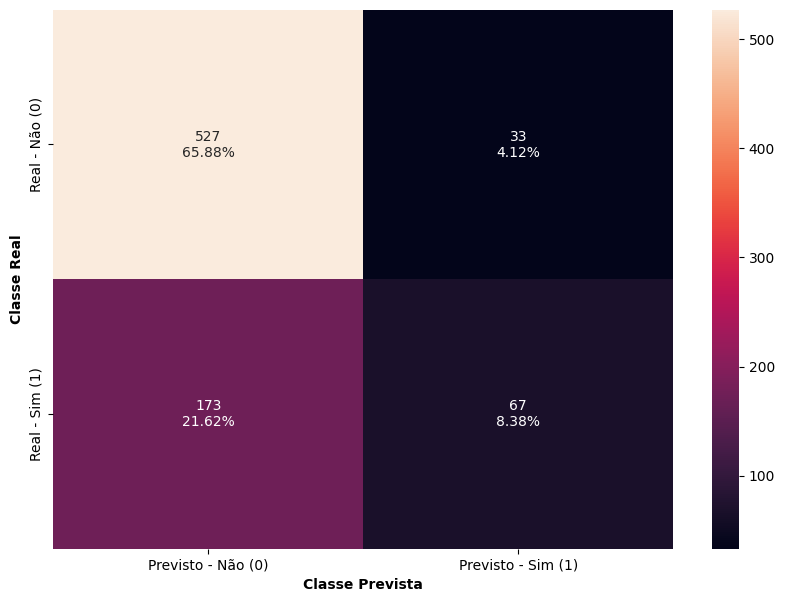

In [30]:
# Matriz de Confus√£o de treino
matriz_confusao(arvore_d1, X_train, y_train)

Vamos verificar a √°rvore aprendida por este modelo:

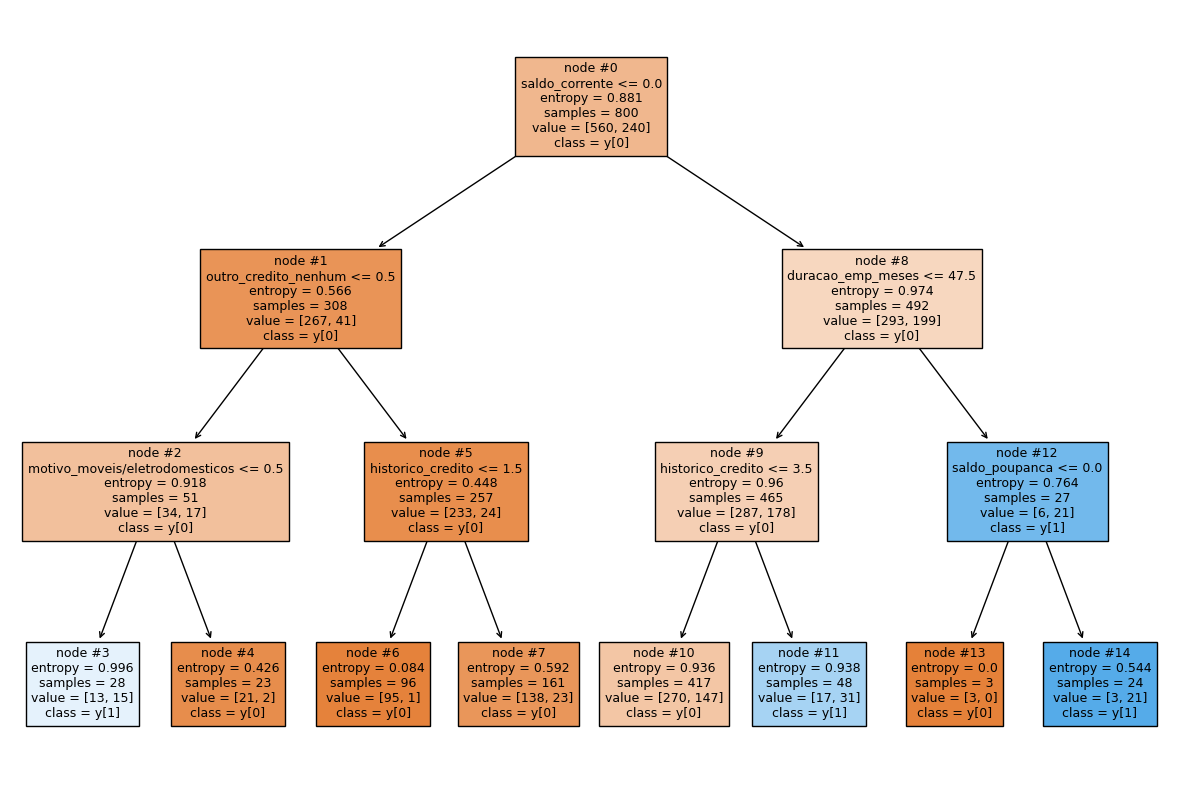

In [31]:
feature_names = list(X_train.columns)

plt.figure(figsize=(15, 10))
tree.plot_tree(arvore_d1, feature_names=feature_names, filled=True,
            fontsize=9, node_ids=True, class_names=True);

Perceba como a entropia em algumas folhas da √°rvore continua alta! √â isto que est√° causando o underfitting nos dados

###Passo 9: Tunining de Hiperpar√¢metros

O Tuning de Hiperpar√¢matros √© o processo de realizar altera√ß√µes nos par√¢metros de um modelo com o intu√≠to de melhorar a sua performance.

Para isso podemos usar a classe ``GridSearchCV``, que far√° uma s√©rie de tentativas combinando diferentes par√¢metros definidos dentro de uma grade e implementando a Valida√ß√£o Cruzada (Cross Validation) para chegar at√© a melhor combina√ß√£o.

In [32]:
# Escolhe o Algoritmo
algo = DecisionTreeClassifier(criterion="entropy", random_state=1)

# Grade de par√¢metros para combinar
parameters = {'max_depth': np.arange(1, 10),
             'min_samples_leaf': [1, 2, 5, 7, 10, 15, 20],
             'max_leaf_nodes': [2, 3, 5, 10],
             'min_impurity_decrease': [0.001, 0.01, 0.1]
             }

# M√©trica usada para comparar as combina√ß√µes de par√¢metros
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Roda a Grid Search
grid_obj = GridSearchCV(algo, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Cria o modelo com a melhor combina√ß√£o
arvore_d2 = grid_obj.best_estimator_

# Treina o modelo
arvore_d2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=15,
                       random_state=1)

Voc√™ deve ter notado que todas essas tentativas de diferentes combina√ß√µes de par√¢metros demoram um pouco para executar. Mas ao final √© mostrado qual o melhor modelo gerado. No nosso exemplo, a profundidade ideal √© de 6 n√≠veis, com 10 n√≥s folhas. O algoritmo escolheu essa melhor combina√ß√£o dentro do espa√ßo amostral que oferecemos pra ele.

Podemos notar uma melhora nas m√©tricas do modelo. Veja abaixo:

In [33]:
arvore_d2_scores = performance_modelo_classificacao(arvore_d2)

Acur√°cia na base de Treino: 0.76
Acur√°cia na base de Teste: 0.74

Recall na base de Treino: 0.5291666666666667
Recall na base de Teste: 0.5333333333333333

Precis√£o na base de Treino: 0.616504854368932
Precis√£o na base de Teste: 0.5714285714285714

F1-Score na base de Treino: 0.569506726457399
F1-Score na base de Teste: 0.5517241379310344


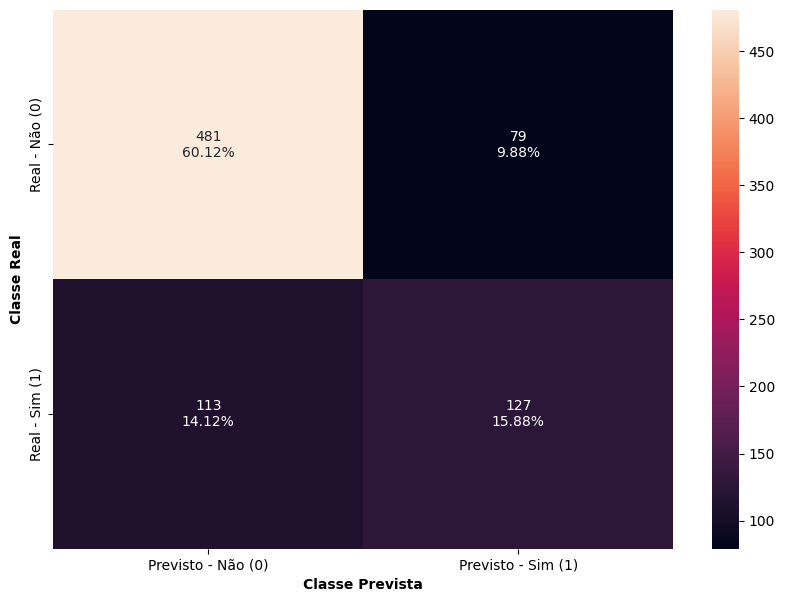

In [34]:
# Matriz de Confus√£o de treino
matriz_confusao(arvore_d2, X_train, y_train)

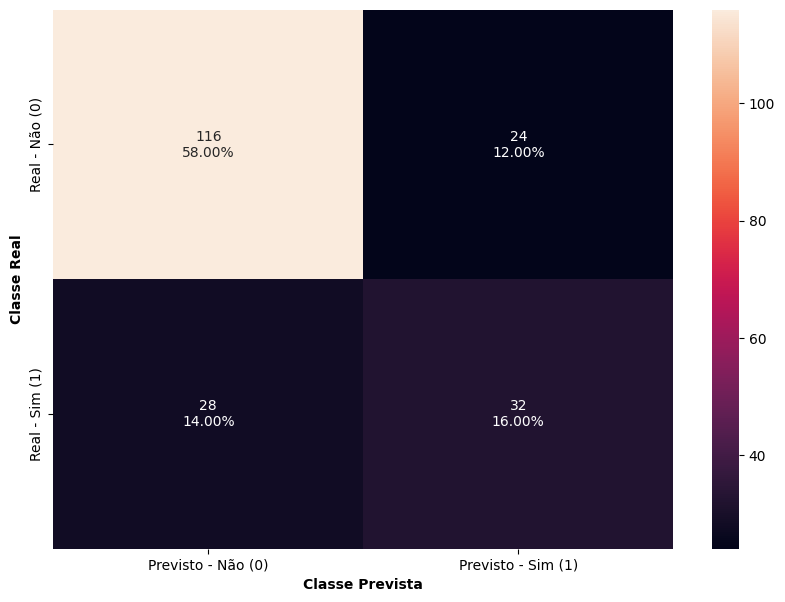

In [35]:
# Matriz de Confus√£o de teste
matriz_confusao(arvore_d2, X_test, y_test)

###Resumo

Vamos listar todos os modelos para compararmos as m√©tricas de performance.

In [36]:
# Lista com todos os modelos
modelos = ['√Årvore de Decis√£o',
          '√Årvore de Decis√£o Podada',
          '√Årvore de Decis√£o Tunada']

# Nomes das colunas
colunas = ['Treino_Acurarcia', 'Val_Acurarcia', 'Treino_Recall', 'Val_Recall',
          'Treino_Precisao', 'Val_Precisao', 'Treino_F1', 'Val_F1']

# DataFrame com todos os modelos e seus respectivos scores
modelos_scores = pd.DataFrame([arvore_d_scores, arvore_d1_scores, arvore_d2_scores],
                             columns=colunas, index=modelos).apply(lambda x: round(x, 2))

modelos_scores.T

√Årvore de Decis√£o  √Årvore de Decis√£o Podada  \
Treino_Acurarcia               1.00                      0.74   
Val_Acurarcia                  0.73                      0.74   
Treino_Recall                  1.00                      0.28   
Val_Recall                     0.55                      0.35   
Treino_Precisao                1.00                      0.67   
Val_Precisao                   0.55                      0.64   
Treino_F1                      1.00                      0.39   
Val_F1                         0.55                      0.45   

                  √Årvore de Decis√£o Tunada  
Treino_Acurarcia                      0.76  
Val_Acurarcia                         0.74  
Treino_Recall                         0.53  
Val_Recall                            0.53  
Treino_Precisao                       0.62  
Val_Precisao                          0.57  
Treino_F1                             0.57  
Val_F1                                0.55

###Fonte:

Documenta√ß√£o da classe `DecisionTreeClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Tutorial que serviu de base para esta aula: https://brains.dev/2023/pratica-arvores-de-decisao/


###Exerc√≠cio Avaliativo

Estude a cria√ß√£o de um modelo de Florestas Aleat√≥rias (Classe `RandomForestClassifier` do `scikitlearn` [Veja a documenta√ß√£o](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) e implemente um modelo que classifique o conjunto de dados desta aula. Estude os par√¢metros deste modelo e tente configur√°-los para conseguir o melhor modelo poss√≠vel (Usar o `GridSearch` para buscar esses modelos pode ser uma boa ideia üòâ).

**O que deve ser entregue?** - Fa√ßa o download desse arquivo em Arquivo - Fazer Download - Baixar o .ipynb e envie no moodle. Antes de baixar, garanta que todas as c√©lulas tenham sido executadas e que a sa√≠das estejam sendo mostradas.


In [37]:
print("<SEU NOME AQUI>")

<SEU NOME AQUI>


In [38]:
# Seu c√≥digo aqui!